# 🧨Data Wrangling: Join, Combine & Reshape

# 1.1 Hierarchical Indexing

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.Series(np.random.uniform(size=9),
                 index=[['a','a','a','b','b','c','c','d','d'],
                 [1,2,3,1,3,1,2,2,3]]
                 )
data

a  1    0.694671
   2    0.552950
   3    0.978872
b  1    0.481042
   3    0.615431
c  1    0.304646
   2    0.540801
d  2    0.963030
   3    0.484818
dtype: float64

In [ ]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [ ]:
data['c']

1    0.304646
2    0.540801
dtype: float64

In [ ]:
#taking multiple index
data.loc[['b','d']]

b  1    0.481042
   3    0.615431
d  2    0.963030
   3    0.484818
dtype: float64

In [ ]:
#taking indexing value 
data.loc[:,2]

a    0.552950
c    0.540801
d    0.963030
dtype: float64

In [ ]:
data.unstack()

,1,2,3
a,0.694671,0.552950,0.978872
b,0.481042,NaN,0.615431
c,0.304646,0.540801,NaN
d,NaN,0.963030,0.484818


In [ ]:
data.unstack().stack()

a  1    0.694671
   2    0.552950
   3    0.978872
b  1    0.481042
   3    0.615431
c  1    0.304646
   2    0.540801
d  2    0.963030
   3    0.484818
dtype: float64

In [ ]:
Frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                    index=[['a','b','c','d'],[1,2,1,2]],
                    columns=[['Axe','Axeor','Axeor'],
                             ['Black','Red','Blue']])
Frame

Axe Axeor     
    Black   Red Blue
a 1     0     1    2
b 2     3     4    5
c 1     6     7    8
d 2     9    10   11

In [ ]:
Frame.index.names =['key1','key2']
Frame

Axe Axeor     
          Black   Red Blue
key1 key2                 
a    1        0     1    2
b    2        3     4    5
c    1        6     7    8
d    2        9    10   11

In [ ]:
Frame.columns.names=['Color','Color_1']
Frame

Color       Axe Axeor     
Color_1   Black   Red Blue
key1 key2                 
a    1        0     1    2
b    2        3     4    5
c    1        6     7    8
d    2        9    10   11

In [ ]:
Frame.index.nlevels

2

In [ ]:
Frame['Axeor']

,Color_1,Red,Blue
key1,key2,,
a,1,1,2
b,2,4,5
c,1,7,8
d,2,10,11


In [ ]:
Frame

Color       Axe Axeor     
Color_1   Black   Red Blue
key1 key2                 
a    1        0     1    2
b    2        3     4    5
c    1        6     7    8
d    2        9    10   11

In [ ]:
Frame.swaplevel('key1','key2')

Color       Axe Axeor     
Color_1   Black   Red Blue
key2 key1                 
1    a        0     1    2
2    b        3     4    5
1    c        6     7    8
2    d        9    10   11

# Summary Statistics By Level

In [ ]:
Frame.groupby(level='key2').mean()
#check the pandas official documentation for more statistics

Color     Axe Axeor     
Color_1 Black   Red Blue
key2                    
1         3.0   4.0  5.0
2         6.0   7.0  8.0

In [ ]:
Frame.groupby(level='Color',axis='columns').sum()

,Color,Axe,Axeor
key1,key2,,
a,1,0,3
b,2,3,9
c,1,6,15
d,2,9,21


In [ ]:
Frame_2 = pd.DataFrame({'a':range(7),
                        'b':range(7,0,-1),
                        'c':['one','one','one','two','two','two','two'],
                        'd':[0,1,2,0,1,2,3]
    
})
Frame_2

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [ ]:
Frame_3 = Frame_2.set_index(['c','d'])
Frame_3

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [ ]:
Frame_2.set_index(['c','d'],drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3



# 🧨Combining and Merging Datasets

In [ ]:
DF_1 = pd.DataFrame({'key':['b','b','a','c','a','a','d'],
                   'data_1':pd.Series(range(7),dtype='Int64')
})
DF_1

,key,data_1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,d,6


In [ ]:
DF_2 = pd.DataFrame({'key':['a','b','d'],
                   'data_2':pd.Series(range(3),dtype='Int64')
})
DF_2

,key,data_2
0,a,0
1,b,1
2,d,2


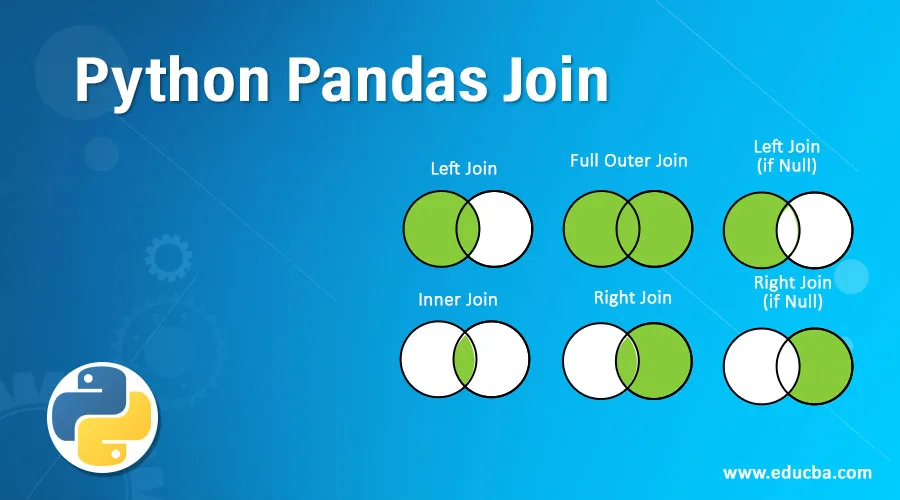

In [ ]:
pd.merge(DF_1,DF_2)

,key,data_1,data_2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,d,6,2


In [ ]:
DF3 = pd.DataFrame({'lkey1':['b','b','a','c','a','a','b'],
                    'data1':pd.Series(range(7),dtype='Int64')})
DF3

,lkey1,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
DF4 = pd.DataFrame({'rkey1':['b','a','d'],
                    'data2':pd.Series(range(3),dtype='Int64')})
DF4

,rkey1,data2
0,b,0
1,a,1
2,d,2


In [ ]:
pd.merge(DF3,DF4,left_on='lkey1',right_on='rkey1')

,lkey1,data1,rkey1,data2
0,b,0,b,0
1,b,1,b,0
2,b,6,b,0
3,a,2,a,1
4,a,4,a,1
5,a,5,a,1


In [ ]:
pd.merge(DF_1,DF_2,how='outer')

,key,data_1,data_2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,c,3,<NA>
6,d,6,2
